<a href="https://colab.research.google.com/github/GPeyB/COMPUTACION2/blob/main/PolRoots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejecución método de la bisección
No existen cambios de signo en el intervalo o existe más de uno
Ejecución del método de newton
La raíz de la función es: 25/8
La raíz de la función es: 625/272
La raíz de la función es: 390625/192032
La raíz de la función es: 152587890625/76272421952
La raíz de la función es: 23283064365386962890625/11641531256183387019392
La raíz de la función es: 542101086242752217003726400434970855712890625/271050543121374391659953053961243098931900672
Ejecución del método de Brent-Decker


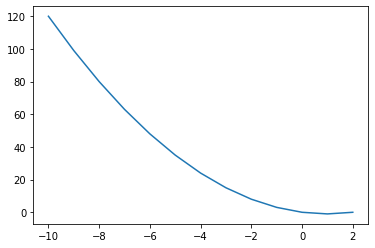

In [44]:
'''
Autor: Gabriel Peytral Borja
19/03/2022
Métodos numéricos para hallar raíces de polinomios:
  *Método gráfico
  *Método de la búsqueda incremental
  *Método de la bisección
  *Método de Newton-Raphson

'''
#Importación de librerías
from sympy import *
import numpy as np
from sympy.abc import x,y
import matplotlib.pyplot as plt
import time

# Método gráfico
class Graph: 
   def graph2DPlot(self, start, end, equation):
      X = np.arange(start, end+1)
      Y = np.zeros_like(X)
      for i in range(len(X)):
          Y[i] = equation.subs(x, X[i])
          #print(Y[i])
      plt.plot(X,Y)

class NumericalMethods:

  def IncrementalSearch(self,a,b,f):
    X = np.linspace(a,b,1100)
    print('x:',X)
    Y = np.zeros_like(X)
    start = time.time()
    for i in range(len(X)):
      if f.subs(x, X[i]==0):
       print("La rapiz es:",X[i])
    end = time.time()
    print('El tiempo total utilizado para la búsqueda incremental fue de:', (end-start))

  def bisectionMetod(self, a , b, f, tol, maxIter):
    error = np.inf
    iter = 0
    # El método para cuando el error es menor q la tolerancia
    # o el número de iteraciones máximas ha sido superado
    while error > tol or iter > maxIter: #Tolerancia 

    #Evaluar la función con x = a, x = b 
      fa = f.subs(x,a)
      fb = f.subs(x,b)

    # Verificar si existe un cambio de signo
      if fa * fb < 0: # Existe cambio de signo
        c = (a+b)/2
        fc = f.subs(x,c)

        if fa * fc < 0: # La raís está en ese intervalo [a,c]
            a = a
            b = c
        elif fa*fc > 0:
            a = c
            b = b 
        elif fa * fc == 0:
          print ('La raíz de:', f, 'se encuentra en:', c)
          break
          exit(0)
        # La raíz podría encontrarse en [c,b]
          error = abs(b-a) # error absoluto
          print ('error:', error)
      else:
        print('No existen cambios de signo en el intervalo o existe más de uno')
        break

  def newtonRaphMethod (self, Xn, f, tol, maxIter):
    error = np.inf 
    iter = 0
    fprime = f.diff(x)
    while (error > tol and iter <= maxIter):
      if fprime.subs(x,Xn) == 0:
        print ('Indeterminación')
        break
      else: 
        Xn1 = Xn - (f.subs(x, Xn) / fprime.subs(x, Xn))
        error = abs(Xn1 -Xn)
        # print("error:", float(error), 'Xn+1:', float(Xn1))
        Xn  = Xn1
        iter = iter+1
        
        if iter == maxIter: 
          print ( 'El método no convergió')
        else: 
          print ('La raíz de la función es:',Xn1)

    return Xn1

  def BrentDeckerMethod(self, a, b, f, tol, MaxIter):
      fa = f.subs(x,a)
      fb = f.subs(x,b)
      c = 0

      if fa * fb < 0:
        c = (a+b)/2
        fc = f.subs(x,c)
        if fc == 0: 
          print('Raíz de la función se encuentra en x:', c)
        if fa*fc <0: #La raíz se encuentra en el intervalo [a,c]
          a = a 
          b = c
        elif fb *fc < 0: 
          a = c
          b = b 

        inter = (((y - fb) * (y- fc))/((fa -fb)*(fa-fc)))*a  + (((y - fa) * (y - fc))/((fb -fa)*(fb-fc)))*b  + (((y - fb) * (y- fc))/((fa -fb)*(fa-fc)))*c


### FUNCIÓN MAIN ###
def main():
  a = -10
  b = 2
  tol = 0.000003
  maxIter = 30000
  x0 = 5

  f = x**2 -2*x


  # objeto para realizar gráfico
  objG = Graph()
  objG.graph2DPlot(a,b,f)
  # objeto para aplicar métodos numéricos 
  objNM = NumericalMethods()


  print('Ejecución método de la bisección')
  objNM.bisectionMetod(a,b,f,tol,maxIter)
  print ('Ejecución del método de newton')
  objNM.newtonRaphMethod(x0,f,tol,maxIter)
  print ('Ejecución del método de Brent-Decker')
  objNM.BrentDeckerMethod(a,b,f,tol,maxIter)
  #print('Ejecución de búsqueda incremental')
  #objNM.IncrementalSearch(a,b,f)


if __name__ == "__main__":
  main ()